In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis

In [2]:
# 加载数据集
print("正在加载数据...")
digits = load_digits()
X, y = digits.data, digits.target
print(f"数据集形状: {X.shape}")

正在加载数据...
数据集形状: (1797, 64)


In [3]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
class KNN:
    def __init__(self, X_train, y_train, X_test, y_test, distance='euclidean'):
        if distance == 'mahalanobis':
            self.distance = self.mahalanobis_distance
        else:
            self.distance = distance
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        # 归一化
        self.X_train_normal = X_train.astype('float32') / 16.0
        self.X_test_normal = X_test.astype('float32') / 16.0
    # 自定义马氏距离函数
    def mahalanobis_distance(self, x, y):
        VI = self.VI
        return mahalanobis(x, y, VI)
    def pca_transform(self):
        print("开始PCA降维...")
        pca = PCA(n_components=50)
        self.X_train_pca = pca.fit_transform(self.X_train_normal)
        self.X_test_pca = pca.transform(self.X_test_normal)
        print(f'降维后的训练集形状: {self.X_train_pca.shape}, 降维后的测试集形状: {self.X_test_pca.shape}')
        # 计算协方差矩阵的逆矩阵
        self.VI = np.linalg.inv(np.cov(self.X_train_pca.T))
    def fit(self):
        # KNN分类
        print("开始KNN分类...")
        self.precision_list = []
        self.recall_list = []
        self.f1_list = []
        self.k_values = range(1, 101)

        # 使用tqdm显示进度条
        from tqdm import tqdm
        for k in tqdm(self.k_values):
            knn = KNeighborsClassifier(n_neighbors=k, metric=self.distance)
            knn.fit(self.X_train_pca, self.y_train)
            y_pred = knn.predict(self.X_test_pca)
            
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            self.precision_list.append(precision)
            self.recall_list.append(recall)
            self.f1_list.append(f1) 
    def plot_precision(self):
        plt.figure()
        plt.plot(self.k_values, self.precision_list, marker='o', markersize=2)
        plt.xlabel('k')
        plt.ylabel('Precision')
        plt.title('Precision')
        plt.grid(True)
        plt.show()
    def plot_recall(self):
        plt.figure()
        plt.plot(self.k_values, self.recall_list, marker='o', markersize=2)
        plt.xlabel('k')
        plt.ylabel('Recall')
        plt.grid(True)
        plt.title('Recall')
        plt.show() 
    def plot_f1(self):
        plt.figure()
        plt.plot(self.k_values, self.f1_list, marker='o', markersize=2)
        plt.xlabel('k')
        plt.ylabel('F1 Score')
        plt.title('F1 Score')
        plt.grid(True)
        plt.show()
    def select_best_k(self):
        # 找出最佳k值
        self.best_k = self.k_values[np.argmax(self.f1_list)]
        print(f"\n最佳k值: {self.best_k}")
        print(f"最佳F1分数: {max(self.f1_list):.4f}")
        print(f"对应的查准率: {self.precision_list[self.best_k-1]:.4f}")
        print(f"对应的召回率: {self.recall_list[self.best_k-1]:.4f}")
    def plot_predictions(self, X_test, y_test, y_pred, indices):
        # 可视化一些预测结果
        fig, axes = plt.subplots(2, 5, figsize=(12, 6))
        for i, idx in enumerate(indices):
            ax = axes[i//5, i%5]
            ax.imshow(self.X_test[idx].reshape(8, 8), cmap='gray')
            ax.axis('off')
            ax.set_title(f'Predict:{y_pred[idx]}\nTrue:{y_test[idx]}', 
                        color='green' if y_pred[idx]==y_test[idx] else 'red')
        plt.tight_layout()
        plt.show()
    def predict_visual(self):
        # 使用最佳k值的模型进行预测
        best_knn = KNeighborsClassifier(n_neighbors=self.best_k, metric=self.distance)
        best_knn.fit(self.X_train_pca, self.y_train)
        y_pred = best_knn.predict(self.X_test_pca)

        # 随机选择10个样本展示预测结果
        random_indices = np.random.choice(len(self.X_test_pca), 10, replace=False)
        self.plot_predictions(self.X_test_pca, self.y_test, y_pred, random_indices)       

欧式距离

In [5]:
k1 = KNN(X_train, y_train, X_test, y_test)
k1.pca_transform()

开始PCA降维...
降维后的训练集形状: (1437, 50), 降维后的测试集形状: (360, 50)


In [6]:
k1.fit()

开始KNN分类...


100%|██████████| 100/100 [00:03<00:00, 25.27it/s]


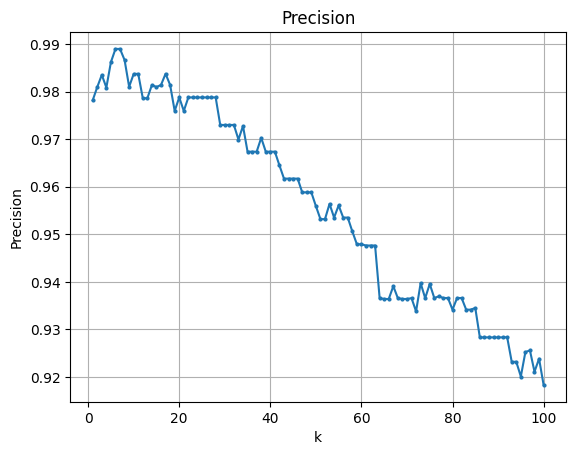

In [7]:
k1.plot_precision()

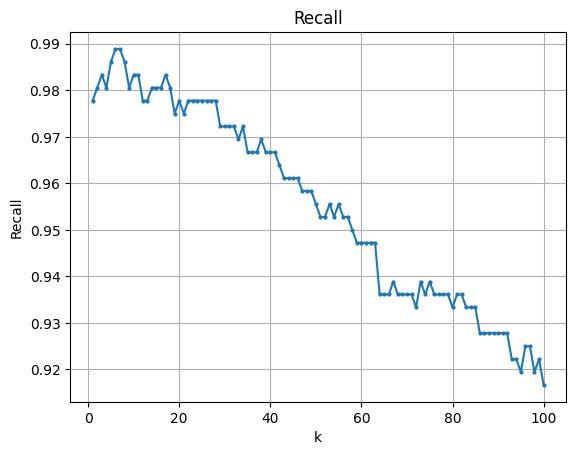

In [8]:
k1.plot_recall()

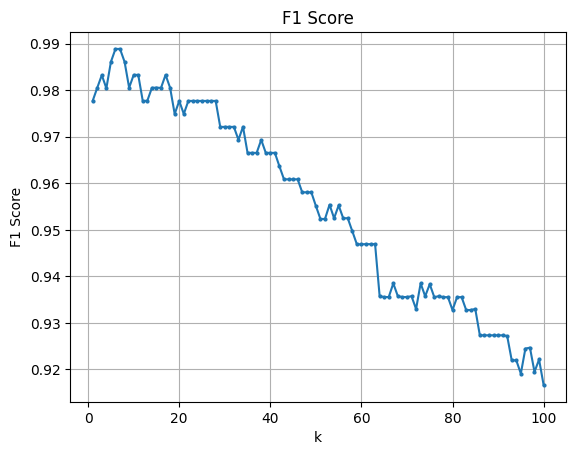

In [9]:
k1.plot_f1()

In [10]:
k1.select_best_k()


最佳k值: 6
最佳F1分数: 0.9888
对应的查准率: 0.9890
对应的召回率: 0.9889


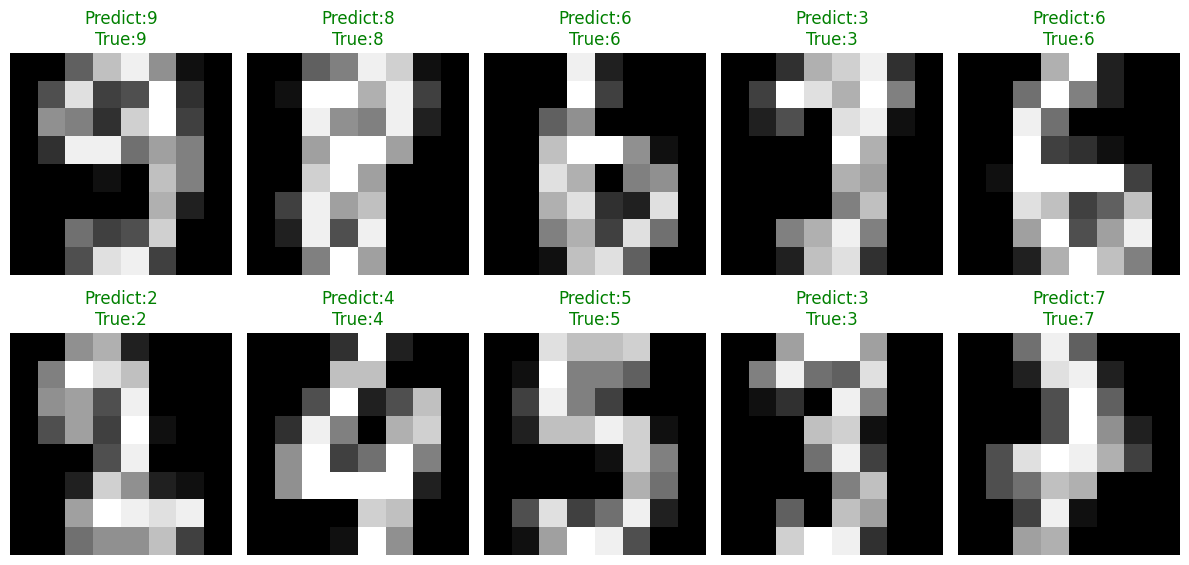

In [11]:
k1.predict_visual()

曼哈顿距离

In [12]:
k2 = KNN(X_train, y_train, X_test, y_test, 'manhattan')
k2.pca_transform()

开始PCA降维...
降维后的训练集形状: (1437, 50), 降维后的测试集形状: (360, 50)


In [13]:
k2.fit()

开始KNN分类...


100%|██████████| 100/100 [00:04<00:00, 23.60it/s]


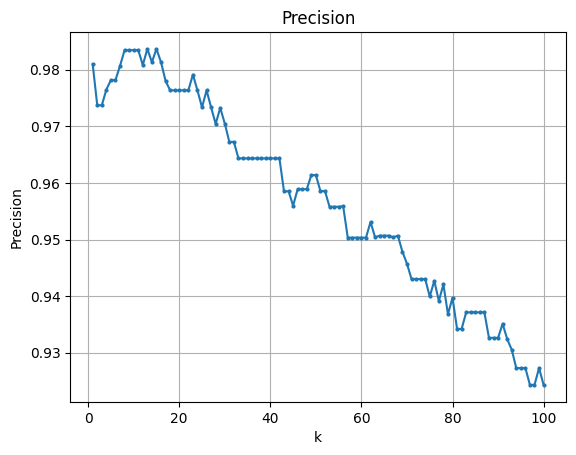

In [14]:
k2.plot_precision()

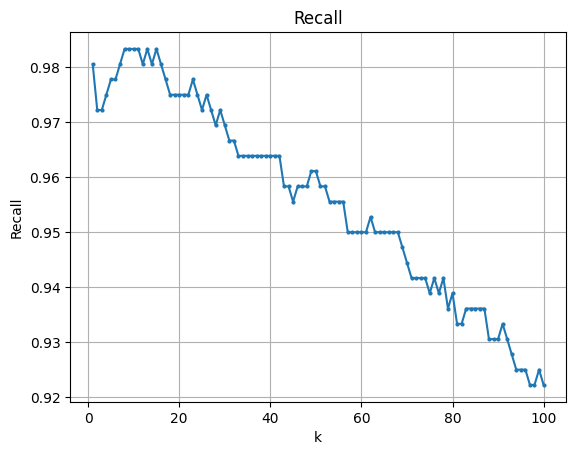

In [15]:
k2.plot_recall()

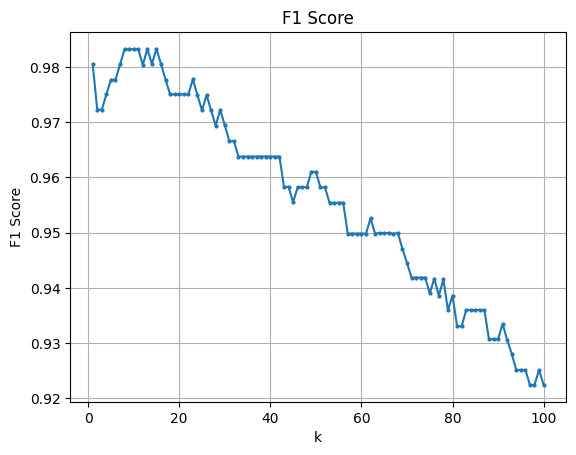

In [16]:
k2.plot_f1()

In [17]:
k2.select_best_k()


最佳k值: 13
最佳F1分数: 0.9833
对应的查准率: 0.9837
对应的召回率: 0.9833


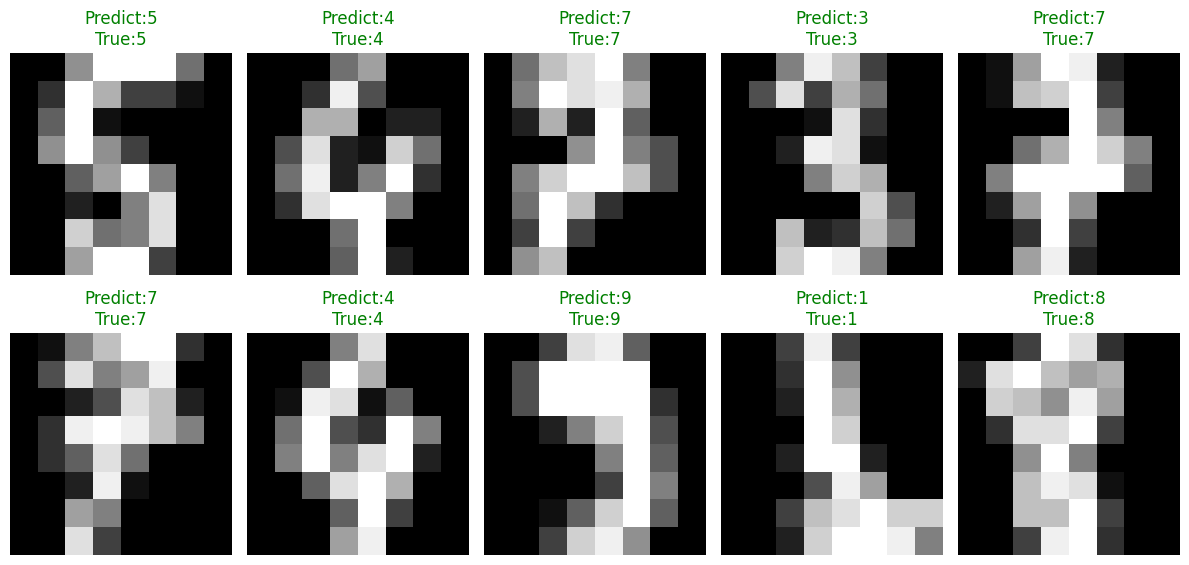

In [18]:
k2.predict_visual()

马氏距离

In [19]:
k3 = KNN(X_train, y_train, X_test, y_test, 'mahalanobis')
k3.pca_transform()

开始PCA降维...
降维后的训练集形状: (1437, 50), 降维后的测试集形状: (360, 50)


In [20]:
k3.fit()

开始KNN分类...


100%|██████████| 100/100 [09:50<00:00,  5.90s/it]


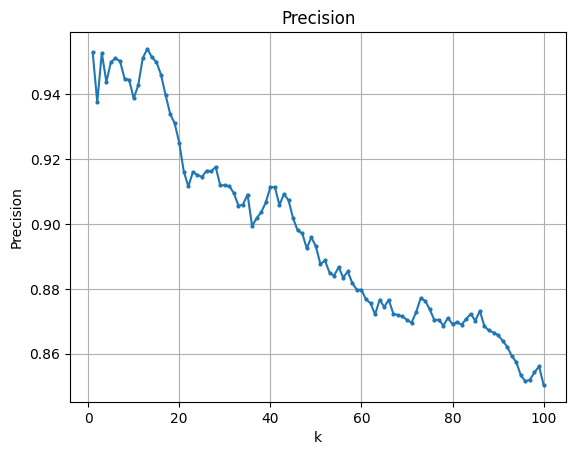

In [21]:
k3.plot_precision()

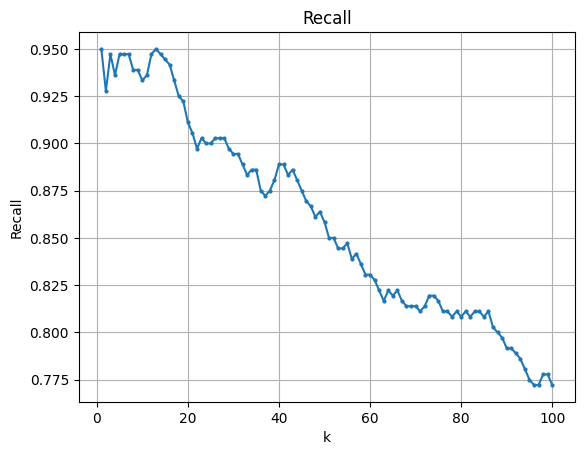

In [22]:
k3.plot_recall()

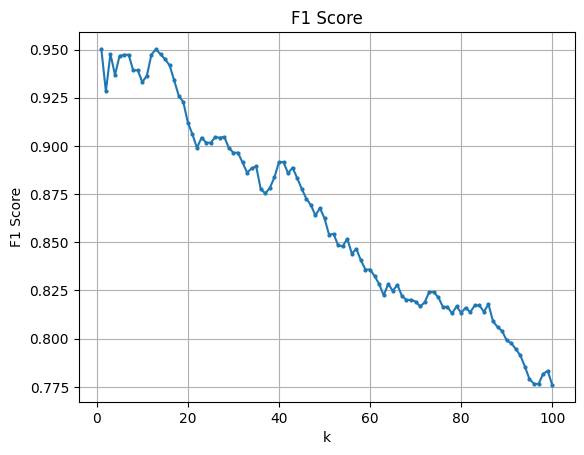

In [23]:
k3.plot_f1()

In [24]:
k3.select_best_k()


最佳k值: 1
最佳F1分数: 0.9503
对应的查准率: 0.9530
对应的召回率: 0.9500


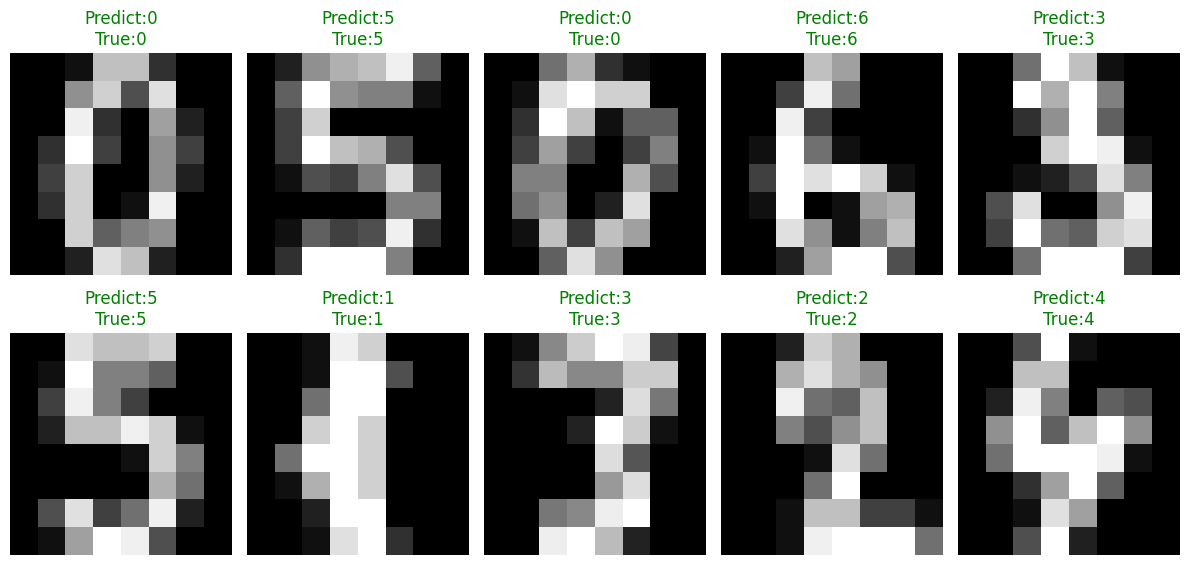

In [25]:
k3.predict_visual()